# Machine Learning for the Detection of Network Attacks


Analyse the machine learning algorithms on the [CICIDS 2017 Dataset] for clasification of network attacks.
(https://www.unb.ca/cic/datasets/ids-2017.html): 

- Support Vector Machine (Proposed Optimized Random Forest)
- Decision Tree
- Naive Bayes
- K Means Clustering 
- K Nearest Neighbours


# Import required libraries.

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sn
import time

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split

# Loading the dataset

The implemented attacks include Brute Force FTP, Brute Force SSH, DoS, Heartbleed, Web Attack, Infiltration, Botnet and DDoS. 

Datasets is available in 8 different csv files.

- Monday-WorkingHours.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

8 different csv files of cicids dataset needs to be concatenated into a single csv file.

In [2]:
# # path to the all 8 files of CICIDS dataset.
# path = './datasets'
# all_files = glob.glob(path + "/*.csv")

# # concatenate the 8 files into 1.
# dataset = pd.concat((pd.read_csv(f) for f in all_files))

In [3]:
# # saving the combined dataset to disk named cicids.csv
# dataset.to_csv('cicids')

In [4]:
dataset=pd.read_csv('cicids.csv')

In [5]:
# Dimenions of dataset.
print(dataset.shape)

(2827876, 79)


In [6]:
# column names as per dataset.

col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [7]:
# Max rows and colummns to be shown in print console

pd.options.display.max_columns= 200
pd.options.display.max_rows= 200

In [8]:
# Assigning the column names.
dataset.columns = col_names

# first 5 records in the dataset.
dataset.head(5)

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_s,Flow_Packets_s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_s,Bwd_Packets_s,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Header_Length,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
# check whether there is any categorical column are not if it is there it is to be encoded.
dataset.dtypes

Destination_Port                 int64
Flow_Duration                    int64
Total_Fwd_Packets                int64
Total_Backward_Packets           int64
Total_Length_of_Fwd_Packets      int64
Total_Length_of_Bwd_Packets      int64
Fwd_Packet_Length_Max            int64
Fwd_Packet_Length_Min            int64
Fwd_Packet_Length_Mean           int64
Fwd_Packet_Length_Std          float64
Bwd_Packet_Length_Max          float64
Bwd_Packet_Length_Min            int64
Bwd_Packet_Length_Mean           int64
Bwd_Packet_Length_Std          float64
Flow_Bytes_s                   float64
Flow_Packets_s                 float64
Flow_IAT_Mean                  float64
Flow_IAT_Std                   float64
Flow_IAT_Max                   float64
Flow_IAT_Min                     int64
Fwd_IAT_Total                    int64
Fwd_IAT_Mean                     int64
Fwd_IAT_Std                    float64
Fwd_IAT_Max                    float64
Fwd_IAT_Min                      int64
Bwd_IAT_Total            

# Remove repeated columns, (NaN,Null,Infinite) values.

In [10]:
# Removing the duplicate columns (Header_length is repeated)
dataset = dataset.loc[:, ~dataset.columns.duplicated()]
dataset.shape

(2827876, 78)

In [11]:
# check if there are any Null values
dataset.isnull().any().any()

False

In [12]:
# Replace Inf values with NaN
dataset = dataset.replace([np.inf, -np.inf], np.nan)

# Drop all occurences of NaN
dataset = dataset.dropna()

# Double check these are all gone
dataset.isnull().any()

Destination_Port               False
Flow_Duration                  False
Total_Fwd_Packets              False
Total_Backward_Packets         False
Total_Length_of_Fwd_Packets    False
Total_Length_of_Bwd_Packets    False
Fwd_Packet_Length_Max          False
Fwd_Packet_Length_Min          False
Fwd_Packet_Length_Mean         False
Fwd_Packet_Length_Std          False
Bwd_Packet_Length_Max          False
Bwd_Packet_Length_Min          False
Bwd_Packet_Length_Mean         False
Bwd_Packet_Length_Std          False
Flow_Bytes_s                   False
Flow_Packets_s                 False
Flow_IAT_Mean                  False
Flow_IAT_Std                   False
Flow_IAT_Max                   False
Flow_IAT_Min                   False
Fwd_IAT_Total                  False
Fwd_IAT_Mean                   False
Fwd_IAT_Std                    False
Fwd_IAT_Max                    False
Fwd_IAT_Min                    False
Bwd_IAT_Total                  False
Bwd_IAT_Mean                   False
B

# Analysing the attacks in dataset

In [13]:
# Distribution of Dataset
dataset['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

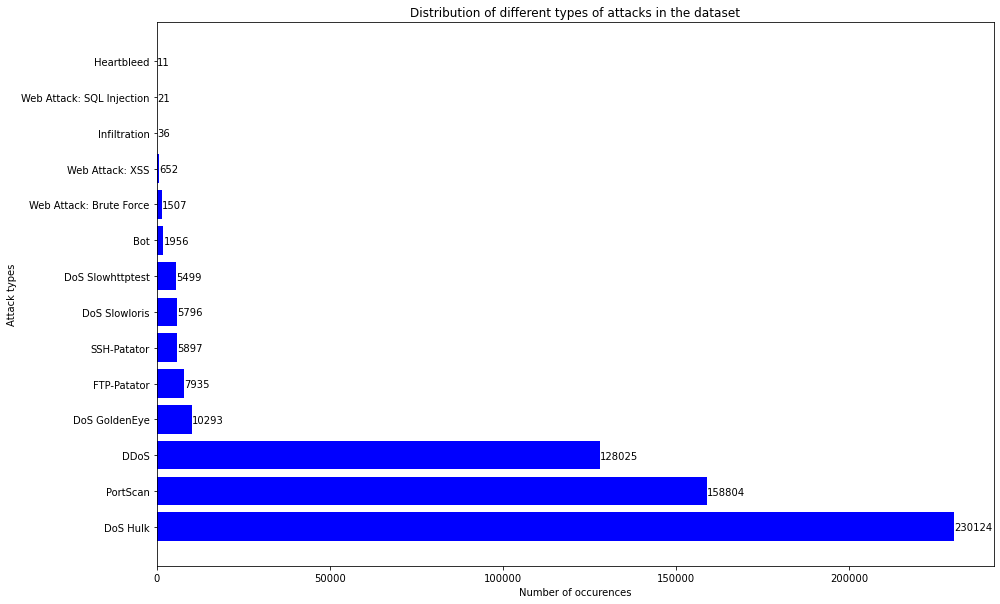

In [14]:
# Plotting the distribution of attacks in the dataset

plt.figure(figsize=(15,10))

attack = ('DoS Hulk', 'PortScan', 'DDoS', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator', 'DoS Slowloris',
          'DoS Slowhttptest', 'Bot', 'Web Attack: Brute Force', 'Web Attack: XSS', 'Infiltration', 'Web Attack: SQL Injection', 'Heartbleed')
y_pos = np.arange(len(attack)) 
amount = dataset['Label'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='blue' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [15]:
# There are only 11, 21, and 36 instances of Heartbleed, SQL injection and infiltration respectively. 
# Remove 'Heartbleed', 'Web attack Sql Injection', 'Infiltration' as it's negligible.

dataset = dataset.replace(['Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'], np.nan)
dataset = dataset.dropna()
dataset['Label'].value_counts()

BENIGN                      2271320
DoS Hulk                     230124
PortScan                     158804
DDoS                         128025
DoS GoldenEye                 10293
FTP-Patator                    7935
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1956
Web Attack � Brute Force       1507
Web Attack � XSS                652
Name: Label, dtype: int64

In [16]:
# Labelling Web Attack � Brute Force as Brute Force
# labelling Web Attack � XSS as XSS

dataset.loc[dataset.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
dataset.loc[dataset.Label == 'Web Attack � XSS', ['Label']] = 'XSS'

In [17]:
# Creating a attack column, containing binary labels for normal and attack to apply binary classsifier

dataset['Attack'] = np.where(dataset['Label'] == 'BENIGN','Normal' , 'Attack')

In [18]:
# Grouping attack labels in attack category as in dataset description for multi-class classifier

attack_group = {'BENIGN': 'benign', 
                'DoS Hulk': 'dos',
                'PortScan': 'probe', 
                'DDoS': 'ddos',
                'DoS GoldenEye': 'dos', 
                'FTP-Patator': 'brute_force',
                'SSH-Patator': 'brute_force', 
                'DoS slowloris': 'dos', 
                'DoS Slowhttptest': 'dos',
                'Bot': 'botnet',
                'Brute Force': 'web_attack', 
                'XSS': 'web_attack'}

# Create grouped label column

dataset['Label_Category'] = dataset['Label'].map(lambda x: attack_group[x])
dataset['Label_Category'].value_counts()

benign         2271320
dos             251712
probe           158804
ddos            128025
brute_force      13832
web_attack        2159
botnet            1956
Name: Label_Category, dtype: int64

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

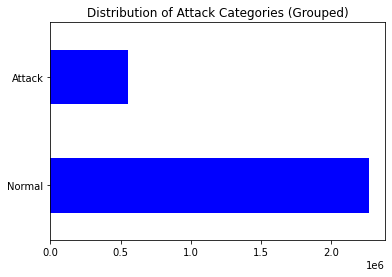

In [19]:
# Plotting binary grouped column Attack

train_attacks = dataset['Attack'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories (Grouped)')

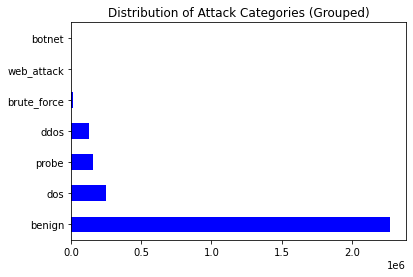

In [20]:
# Plotting multi-class grouped column Label_Category

train_attacks = dataset['Label_Category'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories (Grouped)')

Text(0.5, 1.0, 'Distribution of Attack Categories')

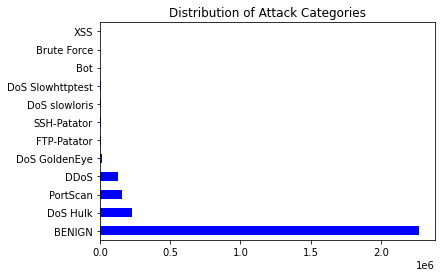

In [21]:
# Plotting multi-label column Label

train_attacks = dataset['Label'].value_counts()
train_attacks.plot(kind='barh', color='blue')
plt.title('Distribution of Attack Categories')

In [22]:
print('Total number of all attack classes :',len(dataset.Label.unique()))
print('Total number of attack categories :',len(dataset.Label_Category.unique()))

Total number of all attack classes : 12
Total number of attack categories : 7


# Splitting the dataset

Splitting dataset in 60:20:20 ratio, for training, testing and validation dataset. 
By stratifying with y label proportions of attacks remain the same throughout the 3 sets. 

In [23]:
# 3 Different labeling options
attacks = ['Label', 'Label_Category', 'Attack']

# xs=feature vectors, ys=labels
xs = dataset.drop(attacks, axis=1)
ys = dataset[attacks]

# split dataset - stratified
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.3, random_state=0, stratify=ys['Label'])

# Removing the columns with single unique values as it has no contribution in classification

In [24]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['Fwd_URG_Flags',
 'Fwd_Header_Length',
 'Fwd_Avg_Bytes_Bulk',
 'Fwd_Avg_Packets_Bulk',
 'Fwd_Avg_Bulk_Rate',
 'Bwd_Avg_Bytes_Bulk',
 'Bwd_Avg_Packets_Bulk',
 'Bwd_Avg_Bulk_Rate']

In [25]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
dataset_copy = dataset.drop(to_drop, axis=1)

In [26]:
x_train.shape

(1979465, 69)

# Data Normalization

Min-max normalization technique is used to normalize the numerical values in dataset.

In [27]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

#  Feature Selection

Selecting K-best features by using chi2 scoring function for features

In [28]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train.Label)

In [29]:
# perform selectkbest with k=40

features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train.Label)

x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [30]:
new_features = dataset_copy.columns[features.get_support(indices=True)]

In [31]:
print('Number of features selected :',len(new_features))
new_features

Number of features selected : 40


Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags',
       'Bwd_PSH_Flags', 'Bwd_Packets_s', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Count', 'RST_Flag_Count', 'ACK_Flag_Count', 'URG_Flag_Count',
       'CWE_Flag_Count', 'Avg_Fwd_Segment_Size', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Active_Min', 'Idle_Mean', 'Idle_Std',
       'Idle_Max', 'Idle_Min'],
      dtype='object')

In [32]:
attack = np.array(['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
                   'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator', 'XSS'])
attack_groups = np.array(['benign', 'botnet', 'brute_force', 'ddos', 'dos', 'probe', 'web_attack'])

# Applying Machine Learning classifier models

Each machine learning algorithm is applied in three different categories :

1. On all attack labels (12).
2. Binary Classifier (2).
3. Multi-class Classifier (7).

And then evaluate performance of each algorithm by confusion matrix plot.
Evaluate Accuracy, Precision, Recall, F1-score.

# Optimizing the best performed Algorithm

Find the number of estimators value we should use

In [57]:
# n estimators is the number of decision trees we consider in the ensemble 
n_estimators = [12, 25, 50, 100, 200]
results = []
time_results = []

In [34]:
# note: takes a long time
for estimator in n_estimators: 
    # fit model with n_estimators parameter
    classifier =  RandomForestClassifier(n_estimators=estimator)
    classifier.fit(x_train, y_train.Label)
    
    # predict validation
    start = time.time()
    y_pred = classifier.predict(x_test)
    end = time.time()
    
    # calculate metrics
    p, r, f1, n = score(y_test.Label, y_pred, average = 'macro')
    
    # append f1 and time to results array
    results.append(f1)
    time_results.append(end-start)
    

In [35]:
# plot classification time for n_estimators
plt.plot(n_estimators, time_results)
plt.xlabel('n_estimators')
plt.ylabel('Classification Time (s)')
plt.title('How n_estimators value changes classification time')
plt.savefig('n_estimators-time.png')

In [36]:
# plot f1 score for n estimators
plt.plot(n_estimators, results)
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.title('How n_estimators value changes F1 score for the validation dataset')
plt.savefig('n_estimators.png')

Although n_estimators=800 was highest, that many number of estimators is not realistic in terms of classificaiton times. We go with the second peak - n_estimators = 25

In [37]:
from sklearn.model_selection import RandomizedSearchCV

max_features = [int(x) for x in np.linspace(2, 40, num = 20)] # from 2 to 40 (max number) of features (up in 2s)
max_features.append('auto') 
max_depth = [int(x) for x in np.linspace(10, 200, num = 10)] # 10 values for max depth from 10 to 200
max_depth.append(None) # also have option for no max depth
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': [25], # chosen n_estimator
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [38]:
# Use the random grid to search for best hyperparameters

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train['Label'])

In [39]:
rf_random.best_params_

# 7. Proposed - Optimized Random forest method

In [40]:
classifier =  RandomForestClassifier(n_estimators=25, max_depth=200, min_samples_split=5, min_samples_leaf=1, max_features=20, 
                                     bootstrap=True)

1. a) On all attack labels.

In [41]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  1023.3599278926849


In [42]:
# predicting test results of Proposed Optimized Random Forest classifier on all labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  3.261446952819824


Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on all Labels 


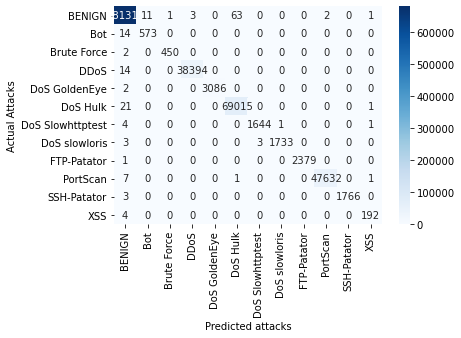

Predicted attacks,BENIGN,Bot,Brute Force,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,PortScan,SSH-Patator,XSS
Actual Attacks,,,,,,,,,,,,
BENIGN,681315,11,1,3,0,63,0,0,0,2,0,1
Bot,14,573,0,0,0,0,0,0,0,0,0,0
Brute Force,2,0,450,0,0,0,0,0,0,0,0,0
DDoS,14,0,0,38394,0,0,0,0,0,0,0,0
DoS GoldenEye,2,0,0,0,3086,0,0,0,0,0,0,0
DoS Hulk,21,0,0,0,0,69015,0,0,0,0,0,1
DoS Slowhttptest,4,0,0,0,0,0,1644,1,0,0,0,1
DoS slowloris,3,0,0,0,0,0,3,1733,0,0,0,0
FTP-Patator,1,0,0,0,0,0,0,0,2379,0,0,0


In [43]:
# Creating confusion matrix for Proposed Optimized Random Forest classifier on all labels.

confusion_rf_proposed_1 = pd.crosstab(y_test.Label, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on all Labels ")

sn.heatmap(confusion_rf_proposed_1, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_proposed_1

In [44]:
# Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on all labels.

precision, recall, fscore, support = score(y_test.Label, y_predict)

d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,BENIGN,0.999890,0.999881,0.999886
1,Bot,0.981164,0.976150,0.978651
2,Brute Force,0.997783,0.995575,0.996678
3,DDoS,0.999922,0.999635,0.999779
4,DoS GoldenEye,1.000000,0.999352,0.999676
5,DoS Hulk,0.999074,0.999681,0.999377
6,DoS Slowhttptest,0.998179,0.996364,0.997270
7,DoS slowloris,0.999423,0.996550,0.997984
8,FTP-Patator,1.000000,0.999580,0.999790
9,PortScan,0.999958,0.999811,0.999885


In [45]:
# Average Accuracy,Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on all labels.

precision_rf_proposed_1, recall_rf_proposed_1, fscore_rf_proposed_1, support = score(y_test.Label, y_predict, average='macro')
accuracy_rf_proposed_1 = accuracy_score(y_test.Label, y_predict)
print("Accuracy of Proposed Optimized Random Forest classifier on all labels : ", accuracy_rf_proposed_1)

Accuracy of Proposed Optimized Random Forest classifier on all labels :  0.9998066819670817


1. b) Binary Classifier.

In [46]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Attack)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  984.4215383529663


In [47]:
# predicting test results of Proposed Optimized Random Forest classifier on binary labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  2.336059093475342


Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on binary Labels 


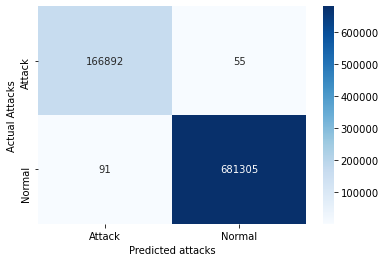

Predicted attacks,Attack,Normal
Actual Attacks,,
Attack,166892,55
Normal,91,681305


In [48]:
# Creating confusion matrix for Proposed Optimized Random Forest classifier on binary labels.

confusion_rf_proposed_2 = pd.crosstab(y_test.Attack, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on binary Labels ")

sn.heatmap(confusion_rf_proposed_2, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_proposed_2

In [49]:
# Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on binary labels.

precision, recall, fscore, support = score(y_test.Attack, y_predict)
d = {'attack': [0,1], 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,0,0.999455,0.999671,0.999563
1,1,0.999919,0.999866,0.999893


In [50]:
# Average Accuracy,Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on binary labels.

precision_rf_proposed_2, recall_rf_proposed_2, fscore_rf_proposed_2, n = score(y_test.Attack, y_predict, average='macro')
accuracy_rf_proposed_2 = accuracy_score(y_test.Attack, y_predict)
print("Accuracy of Proposed Optimized Random Forest classifier on binary labels : ", accuracy_rf_proposed_2)

Accuracy of Proposed Optimized Random Forest classifier on binary labels :  0.999827899799963


1. c) Multi-class Classifier.

In [51]:
# fit the model

start = time.time()
classifier.fit(x_train, y_train.Label_Category)
end = time.time()
training_time = end - start

print("Model Training Time is : ", training_time)

Model Training Time is :  1043.9241540431976


In [52]:
# predicting test results of Proposed Optimized Random Forest classifier on multi-class labels.

start = time.time()
y_predict = classifier.predict(x_test)
end = time.time()
testing_time = end  - start

print("Model Testing Time is : ", testing_time)

Model Testing Time is :  2.8264429569244385


Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on multi-class Labels 


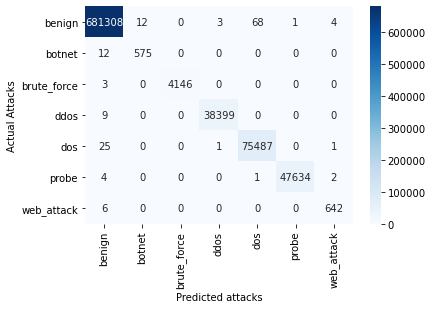

Predicted attacks,benign,botnet,brute_force,ddos,dos,probe,web_attack
Actual Attacks,,,,,,,
benign,681308,12,0,3,68,1,4
botnet,12,575,0,0,0,0,0
brute_force,3,0,4146,0,0,0,0
ddos,9,0,0,38399,0,0,0
dos,25,0,0,1,75487,0,1
probe,4,0,0,0,1,47634,2
web_attack,6,0,0,0,0,0,642


In [53]:
# Creating confusion matrix for Proposed Optimized Random Forest classifier on multi-class labels.

confusion_rf_proposed_3 = pd.crosstab(y_test.Label_Category, y_predict, rownames=['Actual Attacks'], colnames=['Predicted attacks'])

print("Plotting Confusion Matrix of Proposed Optimized Random Forest classifier on multi-class Labels ")

sn.heatmap(confusion_rf_proposed_3, annot=True, cmap= 'Blues', fmt='d')
plt.show()
confusion_rf_proposed_3

In [54]:
# Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on multi-class labels.

precision, recall, fscore, support = score(y_test.Label_Category, y_predict)
d = {'attack': attack_groups, 'precision': precision, 'recall' : recall, 'fscore': fscore}
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,benign,0.999913,0.999871,0.999892
1,botnet,0.979557,0.979557,0.979557
2,brute_force,1.000000,0.999277,0.999638
3,ddos,0.999896,0.999766,0.999831
4,dos,0.999087,0.999642,0.999365
5,probe,0.999979,0.999853,0.999916
6,web_attack,0.989214,0.990741,0.989977


In [55]:
# Average Accuracy,Precision,Recall,F1-score for Proposed Optimized Random Forest classifier on multi-class labels.

precision_rf_proposed_3, recall_rf_proposed_3, fscore_rf_proposed_3, n = score(y_test.Label_Category, y_predict, average='macro')
accuracy_rf_proposed_3 = accuracy_score(y_test.Label_Category, y_predict)
print("Accuracy of Proposed Optimized Random Forest classifier on multi-class labels : ", accuracy_rf_proposed_3)

Accuracy of Proposed Optimized Random Forest classifier on multi-class labels :  0.9998208271890026


### Results for Proposed Optimized Random Forest:

In [56]:
print('Support Vector Machine: Precision / Recall / Fscore / Accuracy')

print('All Labels:', precision_rf_proposed_1, recall_rf_proposed_1, fscore_rf_proposed_1,  accuracy_rf_proposed_1)
print('Binary Labels:', precision_rf_proposed_2, recall_rf_proposed_2, fscore_rf_proposed_2, accuracy_rf_proposed_2)
print('Multi-class Labels:', precision_rf_proposed_3, recall_rf_proposed_3, fscore_rf_proposed_3, accuracy_rf_proposed_3)

Support Vector Machine: Precision / Recall / Fscore / Accuracy
All Labels: 0.9962486723312057 0.9950396397451962 0.9956431954712103 0.9998066819670817
Binary Labels: 0.9996871567168473 0.999768502383763 0.9997278233927755 0.999827899799963
Multi-class Labels: 0.9953780390642109 0.9955295414449206 0.9954536752329985 0.9998208271890026
